# Loading Data

In [57]:
import numpy as np    #Load the dataset into a numpy array
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

X = np.load('X.npy')  #image data
y = np.load('y.npy')  #label data

# Understanding Data


Let's see the shape of the data

In [58]:
print(X.shape)  #shape of the given data shows 5547 images, where every image is 3D (50 x 50 x 3) i.e 50 x 50 pixels and 3 channels(RGB)
                
print(y.shape)  #shows there are 5547 labels 

(5547, 50, 50, 3)
(5547,)


In [59]:
print(X.dtype)
print(y.dtype)

uint8
int64


shape of the given data shows 5547 images, where every image is 3D (50 x 50 x 3) i.e 50 x 50 pixels and 3 channels(RGB)

It also shows there are 5547 labels 

In [60]:
print(np.unique(X))
print('\n')
print(np.unique(y))

[  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 24

The unique values of the image_data ranges between 0 - 255 color spectrum with labeled data of 0 (non_cancer) and 1 (cancerous)

In [61]:
# shuffle data
perm_array = np.arange(len(X))
np.random.shuffle(perm_array)
X = X[perm_array]
y = y[perm_array]

check for imbalance dataset

Non Cancerous cases: 2759
Cancerous cases: 2788
Percentage of positive cases: 50.26%
Shape of the images): (50, 50, 3)
        Count
IDC(-)   2759
IDC(+)   2788


<AxesSubplot:>

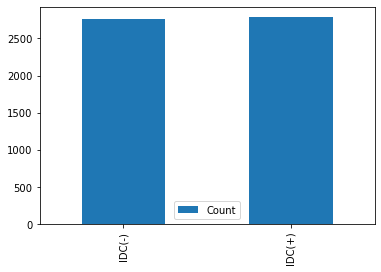

In [62]:
print('Non Cancerous cases: {}'.format(np.sum(y==0)))
print('Cancerous cases: {}'.format(np.sum(y==1)))
print('Percentage of positive cases: {:.2f}%'.format(np.mean(y)*100))
print('Shape of the images): {}'.format(X[0].shape))


IDC_negative = np.sum(y==0)
IDC_positive = np.sum(y==1)

my_array = np.array([IDC_negative, IDC_positive])
df = pd.DataFrame(my_array, columns = ['Count'], index = ['IDC(-)', 'IDC(+)'])
print(df)

df.plot.bar(y='Count')

The dataset is balanced with almost the same number of invasive ductal carcinoma negative and positive cases

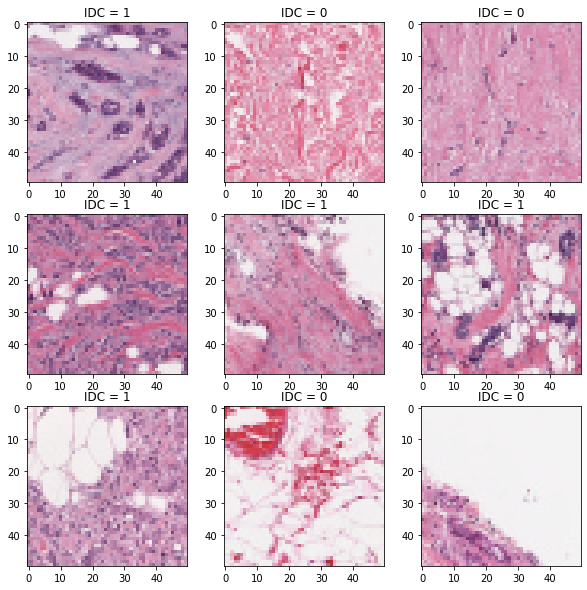

In [63]:
## plot some images  
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.title('IDC = %d'%y[i])
    plt.imshow(X[i])

# Data Preprocessing

In [64]:
X=X.astype('float32')  #for faster training and 

In [65]:
normalization_layer = layers.Rescaling(1./255)  #setting a normamalised formula which will be infused when building the model

Data slicing

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 

In [67]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [68]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4437, 50, 50, 3)
(1110, 50, 50, 3)
(4437,)
(1110,)


Let's Configure our datasets for model performance

In [69]:
BATCH_SIZE = 256
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [70]:
AUTOTUNE = tf.data.AUTOTUNE   #for increasing the training speed of the system

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [71]:
class_names = [0, 1]
for image, label in train_dataset.take(1):
    print("Image data shape: ", image.numpy().shape)
    print("Label data: ", label.numpy())

Image data shape:  (256, 50, 50, 3)
Label data:  [0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1
 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0
 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0
 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0
 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1
 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1]


# Model Building

In this section, We will build a sequential model with three convolution blocks (tf.keras.layers). Each of them has a max pooling layer (tf.keras.layers.MaxPooling2D) in it. A ReLU activation function ('relu') activates a fully connected layer (tf.keras.layers.Dense) with 128 units on top of it.

In [72]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(50, 50, 3)),
    
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
    
  layers.Dense(num_classes)
])

Next, We Compile and Train our Model

In [73]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [74]:
epochs=30
history = model.fit(
  train_dataset,
  validation_data=test_dataset,
  epochs=epochs
)

Epoch 1/30
18/18 [==============================] - 5s 246ms/step - loss: 0.6838 - accuracy: 0.5551 - val_loss: 0.6627 - val_accuracy: 0.5901
Epoch 2/30
18/18 [==============================] - 4s 221ms/step - loss: 0.6196 - accuracy: 0.6644 - val_loss: 0.6448 - val_accuracy: 0.6315
Epoch 3/30
18/18 [==============================] - 4s 224ms/step - loss: 0.5779 - accuracy: 0.7081 - val_loss: 0.6323 - val_accuracy: 0.6423
Epoch 4/30
18/18 [==============================] - 4s 219ms/step - loss: 0.5571 - accuracy: 0.7282 - val_loss: 0.5916 - val_accuracy: 0.6865
Epoch 5/30
18/18 [==============================] - 4s 215ms/step - loss: 0.5328 - accuracy: 0.7460 - val_loss: 0.5646 - val_accuracy: 0.7243
Epoch 6/30
18/18 [==============================] - 4s 221ms/step - loss: 0.5088 - accuracy: 0.7609 - val_loss: 0.5514 - val_accuracy: 0.7387
Epoch 7/30
18/18 [==============================] - 4s 219ms/step - loss: 0.5093 - accuracy: 0.7588 - val_loss: 0.5629 - val_accuracy: 0.7198
Epoch 

Let's see what the training and testing looks like on a graph

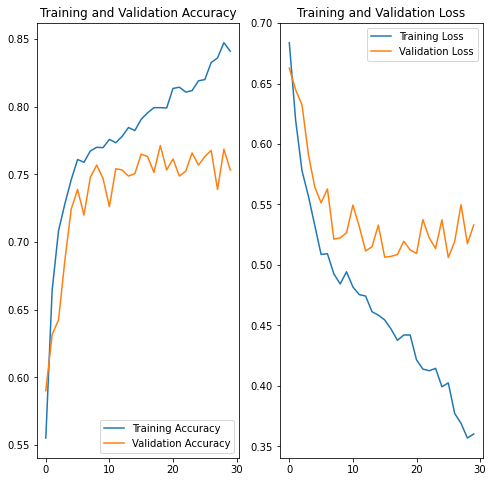

In [75]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The Training and Validation loss plot indicates that the model is overffiting 

In [76]:
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
y_test = np.concatenate([l for i, l in test_dataset])
y_test = to_categorical(y_test)


preds = model.predict(X_test)
print(preds.shape) # which means the predictions return in one-hot encoding format
preds = np.argmax(preds, axis=1)
print(preds.shape)
y_true = np.argmax(y_test, axis=1)
print(y_test.shape)
print(classification_report(y_true, preds, target_names=['IDC(-)', 'IDC(+)']))

(1110, 2)
(1110,)
(1110, 2)
              precision    recall  f1-score   support

      IDC(-)       0.79      0.66      0.72       526
      IDC(+)       0.73      0.84      0.78       584

    accuracy                           0.75      1110
   macro avg       0.76      0.75      0.75      1110
weighted avg       0.76      0.75      0.75      1110



In [77]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, preds)

array([[346, 180],
       [ 94, 490]], dtype=int64)

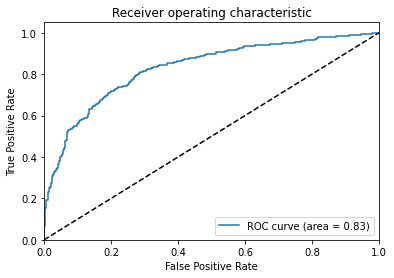

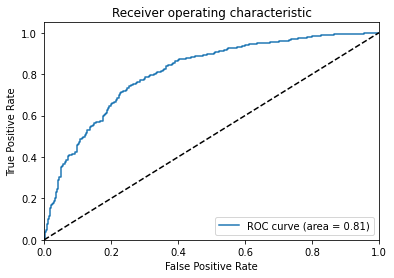

In [78]:
# Compute ROC curve and ROC area for each class


from sklearn.metrics import roc_curve, auc

y_score = model.predict(test_dataset) # get the prediction probabilities

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Plot of a ROC curve for a specific class
for i in range(num_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Data Augmentation

One of the ways of preventing overfitting is to increase the variation in the dataset by augmenting. In this case, I just fliped, rotate and zoom the images

In [79]:

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(50, 50,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In this section, We will build a sequential model with four convolution blocks (tf.keras.layers). Each of them has a max pooling layer (tf.keras.layers.MaxPooling2D) in it. A ReLU activation function ('relu') activates a fully connected layer (tf.keras.layers.Dense) with 128 and we use softmax for the class prediction on top of it.

In [85]:
num_classes = len(class_names)

model2 = Sequential([
  data_augmentation, layers.Rescaling(1./255),
  layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(50,50,3)),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(64, (3,3), activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.Conv2D(256, (3, 3), activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Flatten(), #this converts our 3D feature maps to 1D feature vectors for the dense layer below
  layers.Dropout(0.5),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='sigmoid')
])

In [86]:
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (None, 50, 50, 3)         0         
                                                                 
 rescaling_9 (Rescaling)     (None, 50, 50, 3)         0         
                                                                 
 conv2d_21 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                 

In [87]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 45
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history2 = model2.fit(
  train_dataset,
  validation_data=test_dataset,
  epochs=epochs,
    callbacks = [callback]
)

Epoch 1/45
18/18 [==============================] - 10s 495ms/step - loss: 0.6886 - accuracy: 0.5479 - val_loss: 0.6711 - val_accuracy: 0.6595
Epoch 2/45
18/18 [==============================] - 8s 470ms/step - loss: 0.6271 - accuracy: 0.6673 - val_loss: 0.6209 - val_accuracy: 0.6703
Epoch 3/45
18/18 [==============================] - 8s 468ms/step - loss: 0.5872 - accuracy: 0.7117 - val_loss: 0.6029 - val_accuracy: 0.6946
Epoch 4/45
18/18 [==============================] - 8s 468ms/step - loss: 0.5972 - accuracy: 0.7000 - val_loss: 0.6087 - val_accuracy: 0.6676
Epoch 5/45
18/18 [==============================] - 8s 470ms/step - loss: 0.5778 - accuracy: 0.7162 - val_loss: 0.5753 - val_accuracy: 0.7117
Epoch 6/45
18/18 [==============================] - 9s 488ms/step - loss: 0.5658 - accuracy: 0.7291 - val_loss: 0.5895 - val_accuracy: 0.7171
Epoch 7/45
18/18 [==============================] - 9s 514ms/step - loss: 0.5625 - accuracy: 0.7286 - val_loss: 0.5901 - val_accuracy: 0.7135
Epoch

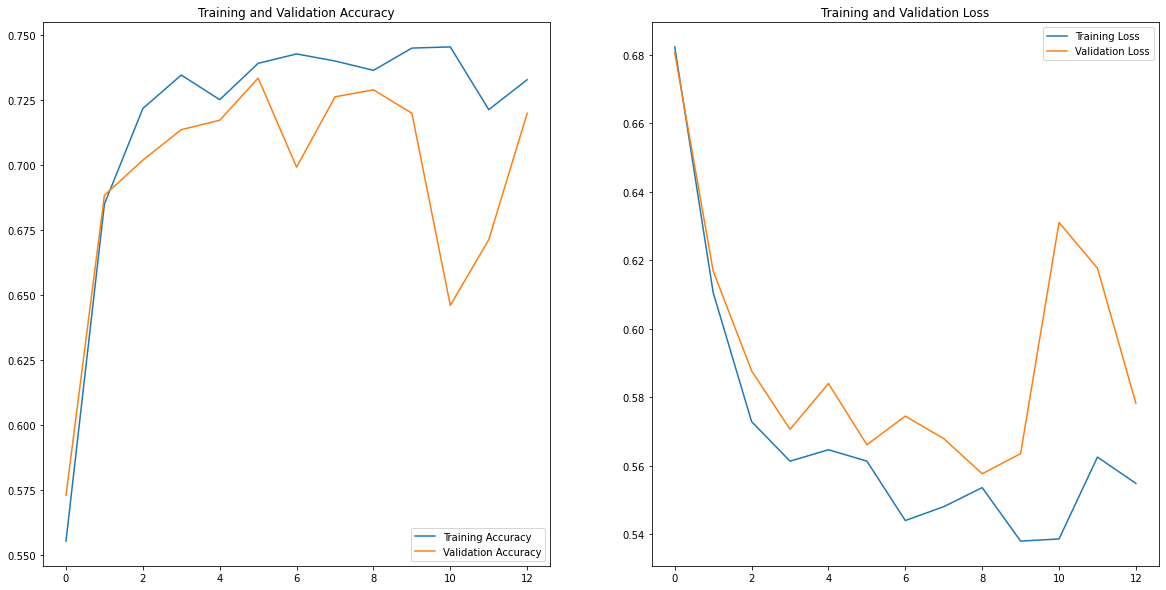

In [84]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(len(history2.history['accuracy']))

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#Compute the classification report of the model's performance on the test set  

In [ ]:
preds = model2.predict(X_test)
print(preds.shape) # which means the predictions return in one-hot encoding format
preds = np.argmax(preds, axis=1)
print(preds.shape)
y_true = np.argmax(y_test, axis=1)
print(y_test.shape)
print(classification_report(y_true, preds, target_names=['IDC(-)', 'IDC(+)']))

There is an improved result in the accuracy of 75% at an early stopping of 19 epochs

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, preds)

In [ ]:
# Compute ROC curve and ROC area for each class

y_score = model.predict(test_dataset) # get the prediction probabilities
y_test = np.concatenate([l for i, l in test_dataset])
y_test = to_categorical(y_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Plot of a ROC curve for a specific class
for i in range(num_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Transfer Learning

In this section we shall use of the VGG16 pretrained model by loading in the weights from Imagenet

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from tensorflow.keras.utils import to_categorical

In [ ]:
vgg16_image_data = vgg16_preprocess_input(X) #preprocessing with default parameters of the pretrained model 

In [ ]:
#Using manual preprocessing techniques by some normalization
vgg16_image_data = X/225

print(vgg16_image_data[0][0][0])


In [ ]:
label_data = to_categorical(y, 2)
print(y[:10])
print(label_data[:10])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
vgg16_xtrain, vgg16_xtest, vgg16_ytrain, vgg16_ytest = train_test_split(vgg16_image_dataset, label_data, test_size = 0.2, random_state = 42)

In [ ]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [ ]:
#We make use of the sequential pretrained model with the augmented data upon which new layers will be added
vgg16_model = Sequential(data_augmentation)

#Initialize the inputs of VGG16 pretrained model
pretrained_model = VGG16(include_top = False, input_shape = (50, 50, 3), weights = 'imagenet', 
                                     pooling = 'avg', classes = 2)
for layer in pretrained_model.layers:
    layer.trainable = False
    #This is to prevent the model from re-learning the weights in order to save time and space complexity

vgg16_model.add(pretrained_model)

vgg16_model.add(Flatten())
vgg16_model.add(Dense(512, activation = 'relu'))
vgg16_model.add(Dense(2, activation = 'sigmoid'))

In [ ]:
vgg16_model.summary()

In [ ]:
from tensorflow.keras.optimizers import Adam
vgg16_model.compile(metrics = ['accuracy'], loss = 'binary_crossentropy', 
                                  optimizer = Adam(learning_rate = 0.001))

epochs = 100
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

vgg16_history = vgg16_model.fit(vgg16_xtrain, vgg16_ytrain, 
                            batch_size = 64, epochs = epochs, 
                            validation_data = (vgg16_xtest, vgg16_ytest), 
                            callbacks = [callback])

In [ ]:
acc = vgg16_history.history['accuracy']
val_acc = vgg16_history.history['val_accuracy']

loss = vgg16_history.history['loss']
val_loss = vgg16_history.history['val_loss']

epochs_range = range(len(vgg16_history.history['accuracy']))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve
#Use the model for prediction and compare the prediction result
vgg16_ypred = vgg16_model.predict(vgg16_xtest)

In [ ]:
vgg16_ypred_argmax = np.argmax(vgg16_ypred, axis = 1)
vgg16_ytest_argmax = np.argmax(vgg16_ytest, axis = 1)

print(classification_report(vgg16_ytest_argmax, vgg16_ypred_argmax))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(vgg16_ypred_argmax, vgg16_ytest_argmax)

In [ ]:
#Compute the ROC- AUC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(vgg16_ytest_argmax[:, ], vgg16_ypred_argmax[:, ])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Plot of a ROC curve for a specific class
for i in range(num_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

the pretrained model did not improve our classification, it had a lower accuracy of 71% after tuning parameters such as output activation= softmax, loss = 'categorical_crossentropy', optimizer learning_rate = 0.001 from defualt Adam learning rate 

# Building an MLP Model

In [ ]:
MLP_model2 = tf.keras.Sequential([data_augmentation,layers.Rescaling(1./255),
    tf.keras.layers.Flatten(input_shape=(1, 7500)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [ ]:
MLP_model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 45
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
Mlp_history = MLP_model2.fit(
  X_train, y_train,
  validation_data=test_dataset,
  epochs=epochs,
    callbacks = [callback]
)

In [ ]:
acc = Mlp_history.history['accuracy']
val_acc = Mlp_history.history['val_accuracy']

loss = Mlp_history.history['loss']
val_loss = Mlp_history.history['val_loss']

epochs_range = range(len(Mlp_history.history['accuracy']))

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

preds = MLP_model2.predict(X_test)
print(preds.shape) # which means the predictions return in one-hot encoding format
preds = np.argmax(preds, axis=1)
print(preds.shape)
y_true = np.argmax(y_test, axis=1)
print(y_test.shape)
print(classification_report(y_true, preds, target_names=['IDC(-)', 'IDC(+)']))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, preds)